In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = np.array([
    [0, 0, 0, 0, 0,],
    [1, 1, 1, 1, 1,],
    [1, 0, 0, 1, 0,],
    [1, 0, 0, 1, 0,],
    [1, 1, 1, 1, 1],
])

In [3]:
def default_cmap(x):
    if x == 1:
        return [0, 255, 0]
    else:
        return [255, 0, 0]
    
def colored(A, cmap):
    im = np.zeros((A.shape[0], A.shape[1], 3), dtype=np.int)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            im[i, j] = cmap(A[i, j])
    return im

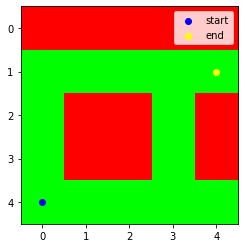

In [4]:
plt.imshow(colored(M, default_cmap))
plt.scatter(0, 4, color="blue", label="start")
plt.scatter(4, 1, color="yellow", label="end")
plt.legend()

In [5]:
def graph_of(B):
    m, n = B.shape
    k = m * n
    A = np.zeros((k, k))
    
    def idx(i, j):
        return i * m + j
    
    for i in range(0, m):
        for j in range(0, n):
            
            # check up
            if i != 0 and B[i, j] and B[i-1, j]:
                A[idx(i, j), idx(i-1, j)] = 1.
                    
            # check left
            if j != 0 and B[i, j] and B[i, j-1]:
                A[idx(i, j), idx(i, j-1)] = 1.
            
            # check down
            if i != m-1 and B[i, j] and B[i+1, j]:
                A[idx(i, j), idx(i+1, j)] = 1.
               
            # check right
            if j != n-1 and B[i, j] and B[i, j+1]:
                A[idx(i, j), idx(i, j+1)] = 1.

    return A    

In [6]:
A = graph_of(M)

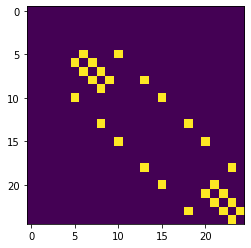

In [7]:
plt.imshow(A)

In [8]:
def plot_lattice(B, A):
    m, n = B.shape
    plt.imshow(colored(B, default_cmap))
    
    def ids(l):
        p = [l // m, l % m]
        return p
    
    def flip(t):
        return [t[1], t[0]]
    
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if A[i, j]:
                # print(f"({i}, {j}) {ids(i)} -> {ids(j)}")
                icoords = flip(ids(i))
                jcoords = flip(ids(j))
                x = [icoords[0], jcoords[0]]
                y = [icoords[1], jcoords[1]]
                plt.scatter(ids(i)[1], ids(i)[0], color="black")#, label=f"{i}")
                plt.plot(x, y, color="black", alpha=0.5)#, label=f"{i} -> {j}")

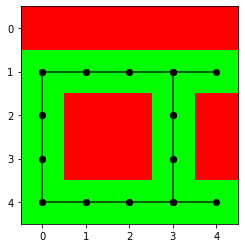

In [9]:
plot_lattice(M, A)

In [10]:
def bfs(A, start, goal):
    k = A.shape[0]
    q = [start]
    froms = {}
    seen = {}
        
    def neighbors(i):
        return [j for j in range(k) if A[i, j] == 1]    
        
    def final_path(end):
        p = [end]
        nextt = froms[end]
        p.append(nextt)
        while nextt != start:
            nextt = froms[nextt]
            p.append(nextt)

        p.reverse()
        return p
    
    while len(q) > 0:
        current = q[0]
        seen[current] = True
        q = q[1:]
        
        for n in neighbors(current):
            if n not in seen:
                q.append(n)
                froms[n] = current
                if n == goal:
                    return final_path(n)
                
    raise Exception("no path to goal")

In [11]:
p = bfs(A, 20, 9)

In [12]:
def plot_path(p, B):
    m, n = B.shape
    plt.imshow(colored(B, default_cmap))
    
    def ids(l):
        p = [l // m, l % m]
        return p
    
    def flip(t):
        return [t[1], t[0]]
    
    for i in range(len(p)-1):
        u, v = p[i], p[i+1]
        
        ucoords = flip(ids(u))
        vcoords = flip(ids(v))
        x = [ucoords[0], vcoords[0]]
        y = [ucoords[1], vcoords[1]]
        plt.plot(x, y, color="black", alpha=0.5)#, label=f"{i} -> {j}")

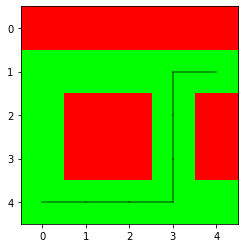

In [13]:
plot_path(p, M)

In [14]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np

n = 2
T = 5
D = 0.4

def interpolate(init, final):
    return np.tile(init, (1, T)) + (final - init) * np.linspace(0, 1, T)

m, n = M.shape

def ids(l):
    return [l // m, l % m]

def flip(t):
    return [t[1], t[0]]

ps = np.zeros((2, T * (len(p)-1)))
print(ps.shape)
for i in range(len(p)-1):
    u, v = p[i], p[i+1]
    ucoords = np.array(flip(ids(u))).reshape((2, 1))
    vcoords = np.array(flip(ids(v))).reshape((2, 1))
    ps[:, i*T:T*(i+1)] = interpolate(ucoords, vcoords)
    
    
# from http://python4econ.blogspot.com/2013/03/matlabs-cylinder-command-in-python.html
def cylinder(r, n):
    """
    Returns the unit cylinder that corresponds to the curve r.
    INPUTS:  r - a vector of radii
             n - number of coordinates to return for each element in r

    OUTPUTS: x,y,z - coordinates of points
    """

    # ensure that r is a column vector
    r = np.atleast_2d(r)
    r_rows, r_cols = r.shape

    if r_cols > r_rows:
        r = r.T
    # find points along x and y axes
    points = np.linspace(0, 2 * np.pi, n + 1)
    x = np.cos(points) * r
    y = np.sin(points) * r

    # find points along z axis
    rpoints = np.atleast_2d(np.linspace(0, 1, len(r)))
    z = np.ones((1, n + 1)) * rpoints.T

    return x, y, z


x, y, z = cylinder(D / 2, 100)
x = x.squeeze()
y = y.squeeze()
z = z.squeeze()

fig, ax = plt.subplots(figsize=(10, 10))
plt.close(fig)

ax.axis("equal")
#ax.axis([-1.5, 1.5, -1.5, 1.5])
p_data = ax.plot(ps[0, :], ps[1, :], color="C0")[0]
ax.scatter(ps[0, :], ps[1, :], color="C0", marker=".")

ax.imshow(colored(M, default_cmap))
def update(i):
    p_data.set_data(ps[0, i] + x, ps[1, i] + y)
    ax.set_title(f"i = {i}")


ani = FuncAnimation(fig, update, interval=100, frames=T*(len(p) - 1))
HTML(ani.to_html5_video())

(2, 35)
